In [32]:
import xarray as xr
import numpy as np 
np.float_  = np.float64
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from wrf import getvar, latlon_coords, to_np
from netCDF4 import Dataset
import glob

In [33]:
file_list = sorted(glob.glob("./wrf_data_outputs/wrfout_d01_2025-12*"))

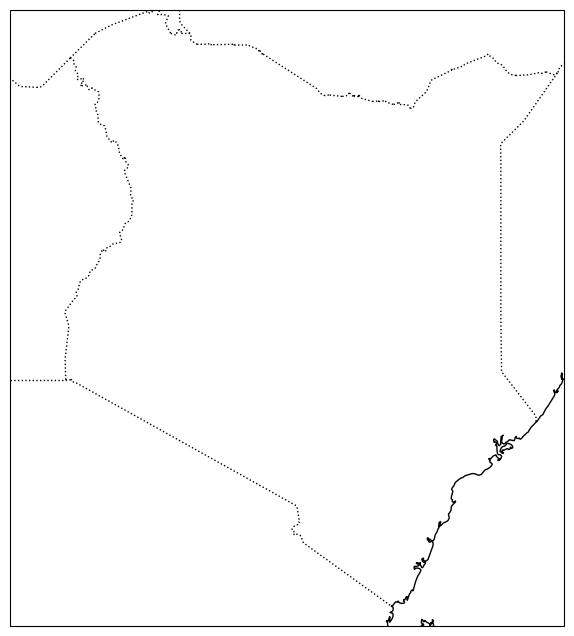

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([33, 42, -5, 5])

In [36]:
temp_nc = Dataset(file_list[0])
t2_init = getvar(temp_nc, "tc")
lats, lons = latlon_coords(t2_init)
temp_nc.close()

NotImplementedError: Dataset is not picklable

In [35]:
first_nc = Dataset(file_list[0])
t2 = getvar(file_list[0], "tc")
lats, lons = latlon_coords(t2)
cont = ax.contourf(to_np(lons), to_np(lats), to_np(t2), levels=20, cmap="jet", vmin=10, vmax=40)
plt.colorbar(cont, label="Temperature (°C)")
title = ax.set_title(f"Kenya Temp: {file_list[0][-19:]}")

AttributeError: 'str' object has no attribute 'variables'

In [ ]:
def update(frame_file):
    ax.collections = [] # Clear previous contours
    nc = Dataset(frame_file)
    temp = getvar(nc, "tc")
    
    # Re-plot the new time step
    ax.contourf(to_np(lons), to_np(lats), to_np(temp), levels=20, cmap="jet", vmin=10, vmax=40)
    title.set_text(f"Kenya Temp: {frame_file[-19:]}")
    nc.close()
    return ax

In [ ]:
ani = FuncAnimation(fig, update, frames=file_list, interval=200)

In [ ]:
ani.save("kenya_simulation_dec2025.mp4", writer="ffmpeg", fps=5)

print("Video saved as kenya_simulation_dec2025.mp4")
plt.close()